## Problem 1

# blast Image Pushed with Python script

In [1]:
%%bash
transeq seqdump.txt allignment.txt

Translate nucleic acid sequences


# Problem 2 
Allign wiith mafft 

In [2]:
%%bash
mafft allignment.txt > alligned.txt


nthread = 0
nthreadpair = 0
nthreadtb = 0
ppenalty_ex = 0
stacksize: 8192 kb
rescale = 1
Gap Penalty = -1.53, +0.00, +0.00



Making a distance matrix ..

There are 1793 ambiguous characters.
  901 / 1000
done.

Constructing a UPGMA tree (efffree=0) ... 
  990 / 1000
done.

Progressive alignment 1/2... 
STEP   400 / 999  f
Reallocating..done. *alloclen = 8413
STEP   901 / 999  f
Reallocating..done. *alloclen = 9721

done.

Making a distance matrix from msa.. 
  900 / 1000
done.

Constructing a UPGMA tree (efffree=1) ... 
  990 / 1000
done.

Progressive alignment 2/2... 
STEP   601 / 999  f
Reallocating..done. *alloclen = 8421
STEP   901 / 999  f
Reallocating..done. *alloclen = 9695

done.

disttbfast (aa) Version 7.471
alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)


Strategy:
 FFT-NS-2 (Fast but rough)
 Progressive method (guide trees were built 2 times.)

If unsure which option to use, try 'mafft --auto input > output'.
For more information, see 'maf

In [65]:
%%bash
head -n 30 alligned.txt

>NC_001563.2_1 West Nile virus lineage 2, complete genome
-------------------------------------SSSPV------------------
----ADKLSSVC------ED-QQLT--------QCELFLGTKISMSKK--------PGG-
--PGKNRAVNMLKRG-MP-RGLSLIGLK--------RAMLSLI-----------DGKGPI
RFVLALLAFFRFTAIAP-TRAVLDRWRGVNKQTAMKHLLSFKKELGTLTSAINRRSTKQK
KRGGTAGFTILLGLIACAGAVTLSNFQGKVMMTVNATDVTDVITIPTAAGKNLCIVRAMD
VGYLCEDTITYECPVLA-AGNDPEDIDCWCTKSSVYVRYGRCTKTRHSRRSRRSLTVQ-T
HGESTLANKKGAWLDSTKATRYLVKTESWILRNPGYALVAAVIGWMLGSNTMQRVVFAIL
LLLVAPAYSFNCLGMSNRDFLEGVSGATWVDLVLEGDSCVTIMSKDKPTIDVKMMNMEAA
NLADVRSYCY-----LASVSDLSTRAACPTMGEAHN---EKRADPAFVCKQGVVDRGWGN
GCGLFGKGSIDTCAKFAC-TTKATGWIIQKENIKYEVAIFVHGPTTVES----HG----K
IGATQAGRFSITPSAPSYTLKLGEYGEVTVDCEPR--------SGIDTSAYYVMSVGEKS
FLVHREWFMDLNLPW-SSAGSTTWR----NRETLMEFEEPHATK---------Q--SVVA
LGSQEGAL-------HQALAGAIPVEFSSNT-----VKLTSGHLKCRVKMEKLQLKGTT-
YGV-------CSKAFKFARTPADTGHGTVVLELQYT------------GTDGP-CKVPIS
SVASLNDLTPV-G-RLVTV-------NPFVSVATANSKVLIELEPPFGDSYIV-----VG
RGEQQINHHWHKSGSSIGK----AFT-

In [64]:
%%bash 
chmod +x FASFA.ipynb 
#make fasfa an exicutable script

In [5]:
from fasta_iterator_class import FASTAReader #IMPORT FASTAReader

# Problem... not all keys have the same name. To combind them, _1 needs to be added to sequences in seqdump then add them as dictionary keys with the data

In [6]:
def aa_converter(aa_file, nuc_file):
    seq_dict = {} #make a dictonary
    aa_seq = FASTAReader(open(aa_file)) #pull alligned Amino Acid sequences for all alignments
    nuc_seq = FASTAReader(open(nuc_file)) #pull raw nucleotide sequences 
    
    for seq_id,sequence in nuc_seq: #In the nucleotide sequences file access the ID
        seq_id_split = seq_id.split() #split the ID
        add_underscore = str(seq_id_split[0]) + '_1' #add the ID back and add a _1 to it
        seq_id_split[0] = add_underscore #replace the new ID name into the original file
        
        new_seq_id = ' '.join(seq_id_split) #join as spaces 
        seq_dict.setdefault(new_seq_id,[sequence]) #make ID key and Nucleotide seq [0] for the key
    for seq_id,sequence in aa_seq:
        seq_dict[seq_id].append(sequence) #make AA sequences for the matching key [1]
    return(seq_dict) #return the dictionay


In [7]:
Seq_dict = aa_converter('alligned.txt','seqdump.txt') #File inputs for aa_converter: saver everything as a Seq_dict

In [8]:
# Codon table for compairing amino acid sequences

codontable = {
'ATA':'I', 'ATC':'I', 'ATT':'I', 'ATG':'M',
'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACT':'T',
'AAC':'N', 'AAT':'N', 'AAA':'K', 'AAG':'K',
'AGC':'S', 'AGT':'S', 'AGA':'R', 'AGG':'R',
'CTA':'L', 'CTC':'L', 'CTG':'L', 'CTT':'L',
'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCT':'P',
'CAC':'H', 'CAT':'H', 'CAA':'Q', 'CAG':'Q',
'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGT':'R',
'GTA':'V', 'GTC':'V', 'GTG':'V', 'GTT':'V',
'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCT':'A',
'GAC':'D', 'GAT':'D', 'GAA':'E', 'GAG':'E',
'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGT':'G',
'TCA':'S', 'TCC':'S', 'TCG':'S', 'TCT':'S',
'TTC':'F', 'TTT':'F', 'TTA':'L', 'TTG':'L',
'TAC':'Y', 'TAT':'Y', 'TAA':'_', 'TAG':'_',
'TGC':'C', 'TGT':'C', 'TGA':'_', 'TGG':'W'
}

# Problem 3 - converting back

# nuc sequence is not equivilent as it is not an alligned sequence... need to add place holders

In [11]:
# Key = id, [0,1] = [DNA,Amino Acids]

for key, value in Seq_dict.items():
    
    count = 0 # start a count of what the nucleotide position is compaired to the AA
    gate = list(value[0]) #working with the nucleotide sequence
    for i in range(len(value[1])): # itterate though the amino acid sequence as it is alligned
        if value[1][i] == '-': # check to see if there is an amino acid in that position 
            gate.insert((count), '---') #insert '---' at the codon position equivilent to the AA position (count)
            gate2 = ''.join(gate) #join sublist
            gate = list(gate2) #inset back in to original nucleotide sequence
        count = count+3 #itterate position in nucleotides
    value[0] = ''.join(gate) #join them all together at the end


# we really dont need to ever use the reference sequence since our first sequence in the dump has 100% identity. Define dictkey1 as search sequence (reference)

In [23]:
query = Seq_dict['NC_001563.2_1 West Nile virus lineage 2, complete genome']
nuc_ref = query[0]
aa_ref = query[1]

# try 1
for key, value in Seq_dict.items():
    # Key = id, Value = [DNA,Amino Acids]
    count = 0
    res = list(value[0])
    for i in range(len(value[1])): # value[1] = amino acid seq
        #print(test_dic['X'][1][i])
        if value[1][i] == '-':
            res.insert((count), '---')
            res2 = ''.join(res)
            res = list(res2)
            #test_dic['X'][0] = res
        count = count+3
    value[0] = ''.join(res)
 # Try 2
dS_vals = []
dN_vals = []
pos = 0
nuc_count = 0
for aa in ref:
    if aa = '-'
        continue
    else:
        dS = 0
        dN = 0
        for names, seqs in dict.items():
            if aa == seqs[1][pos]:
                if nuc_ref[nuc_count:nuc_count+3] == seqs[0][nuc_count:nuc_count+3]:
                    continue
                else:
                    dS+=1
            else:
                dN += 1
    pos +=1
    nuc_count+=3


# WORKING DN/DS Identifier

#try one

'''Calculate dS/dN for each position in
seqs relative to position in ref'''
ds_vals = []
dn_vals = []



for i in range(0,len(nuc_ref),3): 
    if nuc_ref[i] == '-': # nuc_ref[i] = a 3 nuc codon
        continue
    else: #initialize a dn and a ds counter if 
        dS = 0
        dN = 0
        for names, seqs in Seq_dict.items():
            if nuc_ref[i:i+3] == seqs[0][i:i+3]:
                continue
            elif seqs[0][i:i+3] == '---':
                continue
            else: 
                if seqs[0][i:i+3] not in codontable:

                    continue
                else:
                    if codontable[nuc_ref[i:i+3]] == codontable[seqs[0][i:i+3]]: 
                        dS+=1
                    else:
                        dN+=1
        ds_vals.append(dS)
        dn_vals.append(dN)
 
  


In [57]:
DS = [] #list of ds values at each codon
DN = [] #list of dn values at each codon
for i in range(0,len(nuc_ref),3): #itterate through nucleotide sequence 3 at a time for the length of the reference nucleotide sequence
    if nuc_ref[i] == '-': # nuc_ref[i] = a 3 nuc codon; if 
        continue #ignore codons that arnt in the orignal sequence
    else: #if there is a codon in the orginal sequence start a list for ds and dn
        dS = 0
        dN = 0
        for names, seqs in Seq_dict.items(): #
            if nuc_ref[i:i+3] == seqs[0][i:i+3]: #if the refernce and sequence is the same ignore because it cant be ds or dn
                continue
            elif seqs[0][i:i+3] == '---': #if the sequence is missing ignore: cannot be dn or ds
                continue
            else: 
                if seqs[0][i:i+3] not in codontable: #if the sequence is not normal ignore
                    continue
                else:
                    if codontable[nuc_ref[i:i+3]] == codontable[seqs[0][i:i+3]]: #if AA is the same add a DS!
                        dS+=1
                    else: #if they arnt the same add to DN!
                        dN+=1
        #append both
        DS.append(dS)
        DN.append(dN)

In [58]:
print(DN)

[160, 50, 200, 212, 212, 212, 246, 246, 249, 223, 232, 446, 372, 232, 379, 417, 404, 338, 491, 472, 421, 499, 495, 502, 487, 498, 482, 872, 489, 501, 585, 420, 577, 508, 330, 457, 515, 405, 421, 590, 450, 595, 937, 601, 594, 526, 522, 527, 601, 596, 595, 601, 603, 596, 558, 867, 414, 527, 526, 529, 477, 528, 528, 528, 528, 530, 420, 529, 445, 529, 529, 420, 531, 376, 487, 533, 530, 530, 530, 359, 594, 401, 494, 604, 418, 433, 585, 610, 600, 496, 613, 536, 521, 526, 460, 535, 609, 551, 591, 321, 445, 595, 602, 535, 535, 535, 431, 536, 369, 369, 368, 369, 179, 307, 370, 370, 179, 306, 369, 369, 522, 409, 532, 438, 533, 437, 534, 534, 345, 398, 356, 706, 255, 371, 177, 313, 362, 177, 304, 527, 704, 532, 869, 835, 760, 859, 721, 606, 577, 548, 602, 943, 819, 605, 493, 453, 532, 521, 533, 535, 612, 602, 595, 599, 596, 431, 554, 543, 570, 612, 545, 369, 369, 370, 370, 369, 370, 254, 452, 609, 611, 618, 430, 311, 369, 369, 369, 369, 369, 370, 452, 450, 449, 369, 533, 535, 602, 619, 790, 445, 

In [60]:
#sanity check does len dn == len of ds
print(len(DS))
print(len(DN))

3654
3654


# Problem 4 graphs

In [17]:
import pandas as pd

# Remove codon rows that contain a 0 for DN or DS - Create DN/DS

In [70]:
#make pandas to zip together 2 lists of DS and DN

pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.DataFrame(list(zip(dn_vals, ds_vals)), columns =['DN', 'DS']) #zip together two lists (dn and ds) so that 
df


#remove ds or dn values = 0
df2 = df.loc[df["DS"] != 0]
df3 = df2.loc[df["DN"] != 0]

#define dn/ds
df3["dn_df"] = df3['DN']/df['DS']
df3

# add some more stats values which we wwont use again besides d
df3['D'] = df3['DN'] - df3['DS']
df3['mean'] = df3['D'].mean()
df3['stdev'] = df3['D'].std()
df3

,DN,DS,dn_df,D,mean,stdev
0,160,36,4.444444,124,308.106781,244.193695
1,50,13,3.846154,37,308.106781,244.193695
2,200,7,28.571429,193,308.106781,244.193695
3,212,2,106.000000,210,308.106781,244.193695
5,212,10,21.200000,202,308.106781,244.193695
9,223,37,6.027027,186,308.106781,244.193695
10,232,2,116.000000,230,308.106781,244.193695
12,372,4,93.000000,368,308.106781,244.193695
15,417,9,46.333333,408,308.106781,244.193695
16,404,91,4.439560,313,308.106781,244.193695


In [29]:
print(len(df3))

3156


In [76]:
#im
from scipy import stats
from statsmodels.stats import weightstats as stests

In [77]:
pvalues = [] #compute z and p
z = stats.zscore(df3['D'])
for i in range(len(df3["D"])):
    pvalues.append(stats.norm.sf(abs(z[i])))
df3["pvalues"] = pvalues

# graphing DN/DS by codon sequence

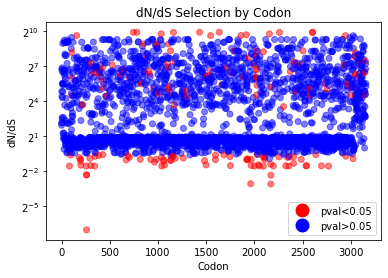

In [105]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# custom janky legiond!
legend_elements = [Line2D([0], [0], marker='o', color='w', label='pval<0.05',
                          markerfacecolor='r', markersize=15),
                   Line2D([0], [0], marker='o', color='w', label='pval>0.05',
                          markerfacecolor='b', markersize=15)]
                  
    
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='lower right')
colors = ['r' if p < 0.025 else 'b' for p in df3['pvalues']] #red if pval is less than .05 or blue if else
ax.scatter(x = range(len(df3)), y = df3['dn_df'], color = colors, alpha = 0.5)
ax.set_yscale('log', base=2)
plt.title('dN/dS Selection by Codon')
plt.xlabel('Codon')
plt.ylabel('dN/dS')
plt.show()